<a href="https://colab.research.google.com/github/arthursuc/MetodosComputacionales1012/blob/main/Parciales/Parcial2_1012.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # Númerica
import matplotlib.pyplot as plt # Gráficas
from scipy.interpolate import CubicSpline, lagrange, interp1d # Interpolación
from scipy.integrate import quad, dblquad, tplquad, trapezoid, simpson # Integración
import sympy as sp # Símbolos

# ⚠ Importante

👁 Puede usar unicamente las librerias vistas en clase (estas están en la parte superior) en caso de agregar una nueva, debe justificarla.

💀 No está permitido el uso de IA's en caso de hacerlo su parcial será **anulado**!

❗ Comente su código y funciones, esto hace parte de la nota.

✅ Responda ordenadamente y con claridad.


### Nombre: ___

# 1

**(30 puntos)** Sea la función $f(x) = 3^x$,

---

a. Defina una función llamada derivada (ver abajo) que encuentre el valor de la derivada en $x=2$ usando diferencias finitas centrales,

$$
f'(x) ≈ \frac{f(x+h) - f(x-h)}{2h}
$$

con una tolerancia menor a $10^{-8}$ y que retorne el valor de $f'(x=2)$ para cada valor de $h$. Tome con $h$ inicial 0.1.

---

b. Realice un gráfico logaritmico del error absoluto asociado a $f'(x)$ en función de $h$, conociendo que

$$
\frac{d}{dx}(b^x) = b^x\ln b
$$





```python
def derivada(f,x, tol = 1e-8):
'''
Recuerde hacer su documentación
'''

  return valor_derivada, h_valores
```



In [14]:
import numpy as np
import math
#funcion
def derivada(f,x, tol = 1e-8):
  """funcion que toma una funcion de variable real,
    calcula puntualmente la derivada de un x específico con una tolerancia variable
    asegurándose de no tener un error muy alto"""
  #fijo las variables para hacer calculos con ellas más sencillos
  error = 1
  h = 0.1
  max_iter = 1000
  i=0
  h_valores = np.array([])
  valores_derivada = np.array([])
  #control de flujo
  while error > tol or i>max_iter:
    #derivada puntual
    valor_derivada = (f(x+h) - f(x-h))/(2*h)
    #divido el h
    h = h/2
    #segundo valor de la derivada para verificar el error
    aux = (f(x+h) - f(x-h))/(2*h)
    error = abs(valor_derivada - aux)
    #guardo los valores
    h_valores = np.append(h_valores, h)
    valores_derivada = np.append(valores_derivada, valor_derivada)
    i+=1
  return valores_derivada, h_valores



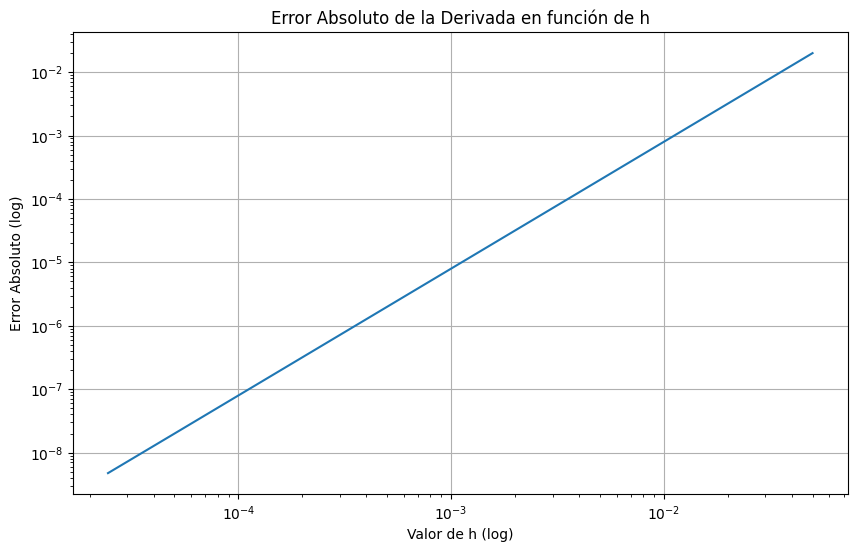

In [15]:
f = lambda x: 3**x
x = 2
#evaluar
valores_derivada, h_valores =derivada(f,x)

#derivada real
derivada_como_tal = f(x) *math.log(3)

#errores, para el grafico
errores_absolutos = np.abs(valores_derivada - derivada_como_tal)

#grafico log
plt.figure(figsize=(10, 6))
plt.loglog(h_valores, errores_absolutos)
plt.xlabel('Valor de h (log)')
plt.ylabel('Error Absoluto (log)')
plt.title('Error Absoluto de la Derivada en función de h')
plt.grid(True)
plt.show()

## 2

**(40 puntos)** Considere un fluido viscoso que fluye en régimen laminar a través de una tubería cilíndrica horizontal de radio $R = 1.0\ \text{cm}$. Se ha medido experimentalmente la velocidad axial del fluido en distintos radios desde el centro de la tubería ($r = 0$) hasta la pared ($r = R$). Los datos obtenidos son:

| $r$ (cm) | $v(r)$ (cm/s) |
|----------|---------------|
| 0.0      | 2.00          |
| 0.2      | 1.92          |
| 0.4      | 1.68          |
| 0.6      | 1.28          |
| 0.8      | 0.72          |
| 1.0      | 0.00          |

Con base en estos datos responda:

---

**a.** Encuentre una expresión para el polinomio interpolador de **Lagrange** para $v(r)$.

---

**b.** Usando las funciones obtenidas por **Lagrange** y **CubicSpline**, haga un gráfico donde se muestre el comportamiento de ambas interpolaciones, comparándolas con los datos experimentales.

---

**c.** Calcule la derivada $\frac{dv}{dr}$, correspondiente al **gradiente de velocidad radial** usando los datos procedentes de la interpolación CubicSpline. Use `np.gradient` con $h = 10^{-4}$.

---

**d.** Determine el **esfuerzo cortante** en el fluido, dado por:

$$
\tau(r) = \mu \frac{dv}{dr},
$$

donde $\mu = 0.001\ \text{Pa}\cdot\text{s}$ es la viscosidad dinámica del fluido. Grafique $\tau(r)$ para $r \in [0, 1]$.

---



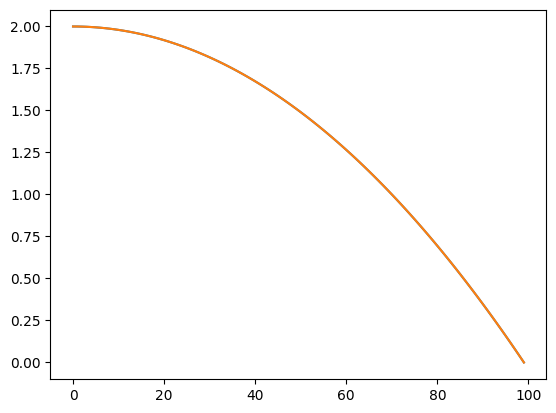

In [21]:
#a
#importo el metodo de interpolacion lagrange y cubicspline
from scipy.interpolate import CubicSpline
from scipy.interpolate import lagrange


valores_r = np.array([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
valores_v = np.array([2.00, 1.92, 1.68, 1.28, 0.72, 0.00])
#b

lagrange_polinomio = lagrange(valores_r, valores_v)
cubic_spline = CubicSpline(valores_r , valores_v)


r_suave = np.linspace(0, 1, 100)
lagrange_suave = lagrange_polinomio(r_suave)
cubic_spline = cubic_spline(r_suave)

plt.plot(lagrange_suave)

plt.plot(cubic_spline)



# 3

**(30 puntos)** Considere un sólido tetraédrico $R$ delimitado por los planos:

- $x = 0$, $y = 0$, $z = 0$,  
- y el plano $x + y + z = 1$.

Este sólido ocupa una región en el primer octante y está contenido completamente dentro del cubo unidad.

La densidad del sólido es variable y está dada por $\rho(x, y, z) = xyz$ [kg/m³].

Considere:


$$
\iiint_R f(x,y,z)\, dV = \int_0^1 \int_0^{1-x} \int_0^{1-x-y} f(x,y,z)\, dz\, dy\, dx
$$

con

$$
dV = dz\,dy\,dx
$$

---

a. Calcule la **masa total** del sólido:

$$
m = \iiint_R \rho(x, y, z)\, dV.
$$

Usando la forma iterativa de `quad`, compare su resultado con `tplquad`.

---

b. Calcule el **momento de inercia respecto a los ejes $x$ y $z$**, definidos como:

$$
I_z = \iiint_R (x^2 + y^2)\, \rho(x, y, z)\, dV.
$$

$$
I_x = \iiint_R (y^2 + z^2)\, \rho(x, y, z)\, dV.
$$

Puede usar la forma iterativa de `quad` o `tplquad`.





In [ ]:
# Aquí va su código